In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Layer
from tensorflow.keras.optimizers import SGD, Adam
import numpy as np
import matplotlib.pyplot as plt 
import math as mt

In [2]:
loss_tracker = keras.metrics.Mean(name="loss")

class Function(keras.Model):
    def train_step(self, data):
        batch_size = 5
        x = tf.random.uniform((batch_size,), minval=-1, maxval=1)
        eq = 1 + 2*x + 4*x**3

        with tf.GradientTape() as tape:
            y_pred = self(x, training=True)
            loss = keras.losses.mean_squared_error(y_pred,eq)

        grads = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        loss_tracker.update_state(loss)

        return {"loss": loss_tracker.result()}

In [3]:
class SinTransform(tf.keras.layers.Layer):
    def __init__(self, num_outputs):
        super(SinTransform,self).__init__()
        self.num_outputs = num_outputs

        self.freq = tf.range(1., self.num_outputs + 1)

        self.kernel = self.add_weight("kernel",
                                shape=[self.num_outputs])

    def call(self, inputs):
        inputs = tf.convert_to_tensor(inputs)
        if (inputs.shape == ()):
            inputs=(inputs,)
        elif (len(inputs.shape)==1):
            inputs=tf.expand_dims(inputs, axis=1)
        batch = tf.shape(inputs)[0]
        self.freq_b = tf.ones([batch,1])*self.freq
        args = self.freq_b * inputs
        modes = tf.math.sin(args)
        return tf.tensordot(modes,self.kernel,1)

In [4]:
inputs = keras.Input(shape=(1,))
x = SinTransform(10)(inputs)
model = Function(inputs=inputs,outputs=x)

model.compile(optimizer=SGD(learning_rate=0.1), metrics=['loss'])

x=tf.linspace(-1,1,100)
history = model.fit(x,epochs=50,verbose=1)

Epoch 1/50
4/4 [==============================] - 0s 1ms/step - loss: 5.6081
Epoch 2/50
4/4 [==============================] - 0s 985us/step - loss: 3.5187
Epoch 3/50
4/4 [==============================] - 0s 1ms/step - loss: 2.9563
Epoch 4/50
4/4 [==============================] - 0s 917us/step - loss: 2.5518
Epoch 5/50
4/4 [==============================] - 0s 942us/step - loss: 2.2804
Epoch 6/50
4/4 [==============================] - 0s 923us/step - loss: 2.0971
Epoch 7/50
4/4 [==============================] - 0s 953us/step - loss: 1.9753
Epoch 8/50
4/4 [==============================] - 0s 851us/step - loss: 1.8699
Epoch 9/50
4/4 [==============================] - 0s 885us/step - loss: 1.8202
Epoch 10/50
4/4 [==============================] - 0s 1ms/step - loss: 1.7365
Epoch 11/50
4/4 [==============================] - 0s 895us/step - loss: 1.6783
Epoch 12/50
4/4 [==============================] - 0s 917us/step - loss: 1.6412
Epoch 13/50
4/4 [==============================] - 0s 9

4/4 [==============================] - 0s 946us/step


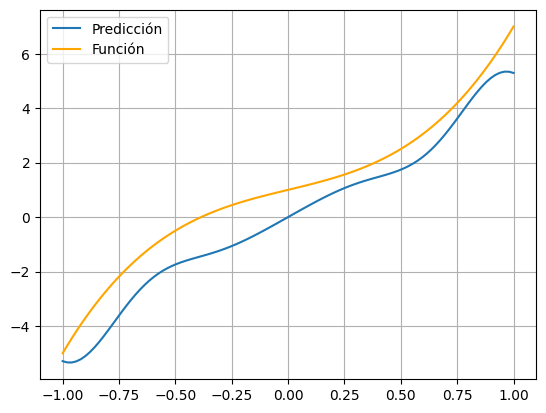

In [5]:
x_testv = tf.linspace(-1,1,100)
a=model.predict(x_testv)

plt.plot(x_testv,a, label = "Predicción")
plt.plot(x_testv, 1 + 2*x + 4*x**3, label = "Función", color = "orange")
plt.legend()
plt.grid()
plt.show()